# Data Visualization of Indian_Food_Dataset
# Data Frame for the classes and number of images in each class

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import confusion_matrix ,classification_report

In [2]:
image_dir=Path('/kaggle/input/indian-food-classification')

In [3]:
filepaths=list(image_dir.glob(r'**/*.jpg'))
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
filepaths=pd.Series(filepaths,name='Filepaths').astype(str)
labels=pd.Series(labels,name='Label')
images=pd.concat([filepaths,labels],axis=1)
category_samples=[]

for category in images['Label'].unique():
    category_slices=images.query('Label==@category')
    category_samples.append(category_slices.sample(frac=1,random_state=1))
image_df=pd.concat(category_samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)

In [4]:
image_df

Filepaths          Label
0     /kaggle/input/indian-food-classification/Food ...  chole_bhature
1     /kaggle/input/indian-food-classification/Food ...        chapati
2     /kaggle/input/indian-food-classification/Food ...   kadai_paneer
3     /kaggle/input/indian-food-classification/Food ...          kulfi
4     /kaggle/input/indian-food-classification/Food ...         samosa
...                                                 ...            ...
6248  /kaggle/input/indian-food-classification/Food ...  chole_bhature
6249  /kaggle/input/indian-food-classification/Food ...    butter_naan
6250  /kaggle/input/indian-food-classification/Food ...           idli
6251  /kaggle/input/indian-food-classification/Food ...          momos
6252  /kaggle/input/indian-food-classification/Food ...    butter_naan

[6253 rows x 2 columns]

In [5]:
image_df['Label'].value_counts()

Label
chapati          413
kadai_paneer     412
chole_bhature    410
chai             381
fried_rice       353
pav_bhaji        353
butter_naan      328
dal_makhani      319
momos            319
masala_dosa      311
burger           309
idli             306
kaathi_rolls     293
jalebi           293
dhokla           289
pakode           278
pizza            261
samosa           261
kulfi            234
paani_puri       130
Name: count, dtype: int64

In [6]:
# This operation would be performed on the actual 'image_df' DataFrame
label_counts = image_df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Counts']
label_counts

Label  Counts
0         chapati     413
1    kadai_paneer     412
2   chole_bhature     410
3            chai     381
4      fried_rice     353
5       pav_bhaji     353
6     butter_naan     328
7     dal_makhani     319
8           momos     319
9     masala_dosa     311
10         burger     309
11           idli     306
12   kaathi_rolls     293
13         jalebi     293
14         dhokla     289
15         pakode     278
16          pizza     261
17         samosa     261
18          kulfi     234
19     paani_puri     130

# Bar Graph for displaying number of images in each class

In [7]:
# This operation would be performed on the actual 'image_df' DataFrame
label_counts = image_df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Counts']
label_counts

Label  Counts
0         chapati     413
1    kadai_paneer     412
2   chole_bhature     410
3            chai     381
4      fried_rice     353
5       pav_bhaji     353
6     butter_naan     328
7     dal_makhani     319
8           momos     319
9     masala_dosa     311
10         burger     309
11           idli     306
12   kaathi_rolls     293
13         jalebi     293
14         dhokla     289
15         pakode     278
16          pizza     261
17         samosa     261
18          kulfi     234
19     paani_puri     130

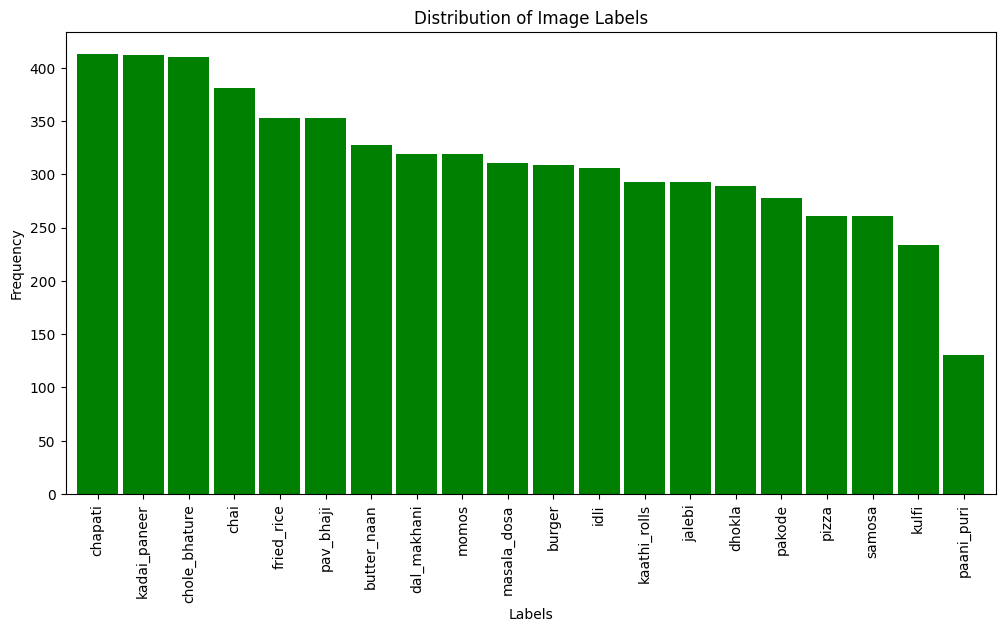

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming image_df is a DataFrame and 'Label' is a column containing the labels of the images

# Generate a counts of the unique values in the 'Label' column
label_counts = image_df['Label'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))  # Adjust the size as needed
label_counts.plot(kind='bar',width= 0.9, color='green')

plt.title('Distribution of Image Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)  # Rotates the labels on the x-axis to make them readable
plt.show()


# Displaying an Image from Each Class

In [9]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
SEED = 42
PATH = "../input/indian-food-classification/Food Classification"

In [10]:
data_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)


Found 6269 files belonging to 20 classes.


In [11]:
# Get class names
classes = data_ds.class_names

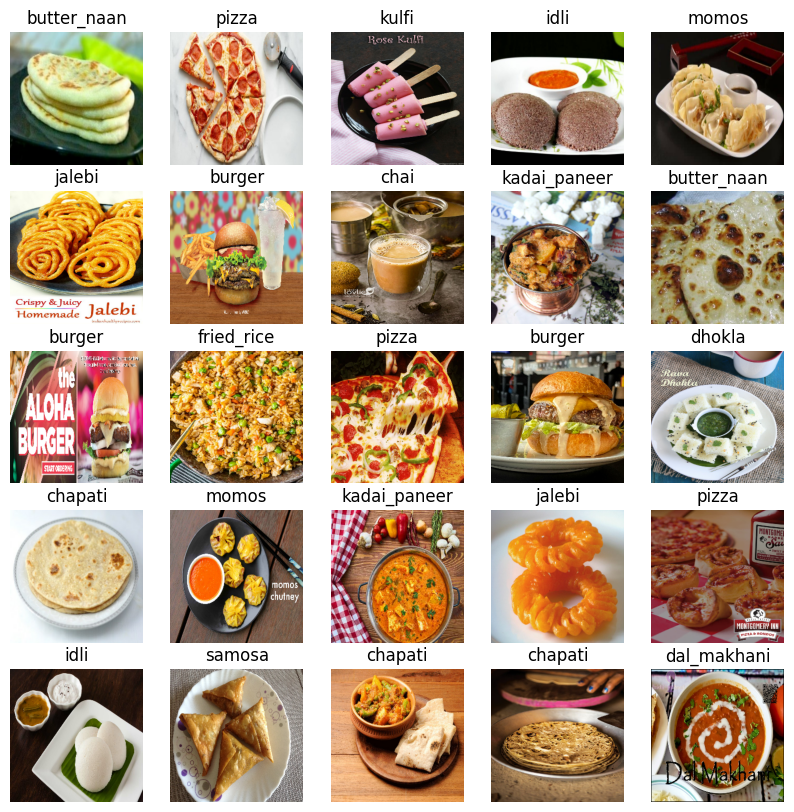

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data_ds.take(2):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

# Bar Graph displaying CUmulative distribution and Box plot represnetation

In [13]:
# This operation would be performed on the actual 'image_df' DataFrame
label_counts = image_df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Counts']
label_counts

Label  Counts
0         chapati     413
1    kadai_paneer     412
2   chole_bhature     410
3            chai     381
4      fried_rice     353
5       pav_bhaji     353
6     butter_naan     328
7     dal_makhani     319
8           momos     319
9     masala_dosa     311
10         burger     309
11           idli     306
12   kaathi_rolls     293
13         jalebi     293
14         dhokla     289
15         pakode     278
16          pizza     261
17         samosa     261
18          kulfi     234
19     paani_puri     130

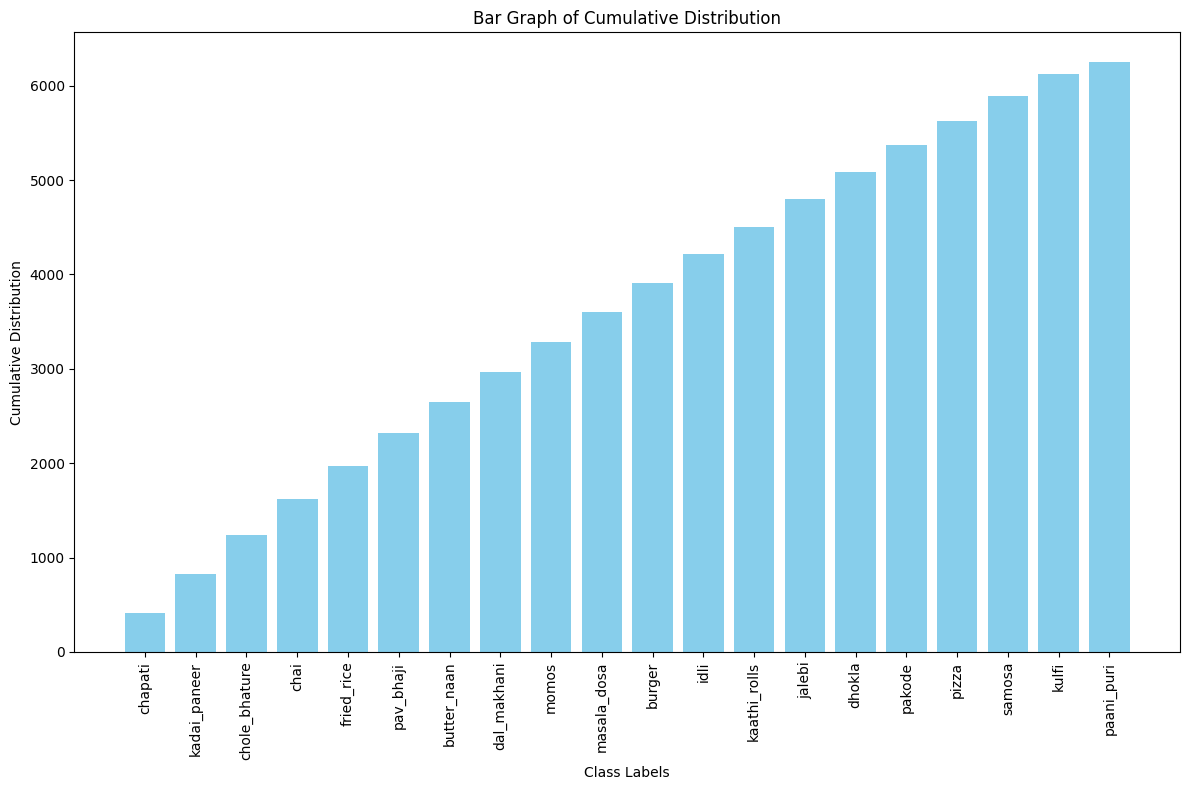

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'image_df' is your original DataFrame and has a column 'Label'
# Calculating the value counts and resetting index
label_counts = image_df['Label'].value_counts().reset_index()
# Renaming the columns
label_counts.columns = ['Label', 'Counts']
# Calculating the cumulative distribution
label_counts['Cumulative'] = label_counts['Counts'].cumsum()

# Now, plotting the bar graph for the cumulative distribution
plt.figure(figsize=(12, 8))
plt.bar(label_counts['Label'], label_counts['Cumulative'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class Labels')
plt.ylabel('Cumulative Distribution')
plt.title('Bar Graph of Cumulative Distribution')
plt.tight_layout()
plt.show()


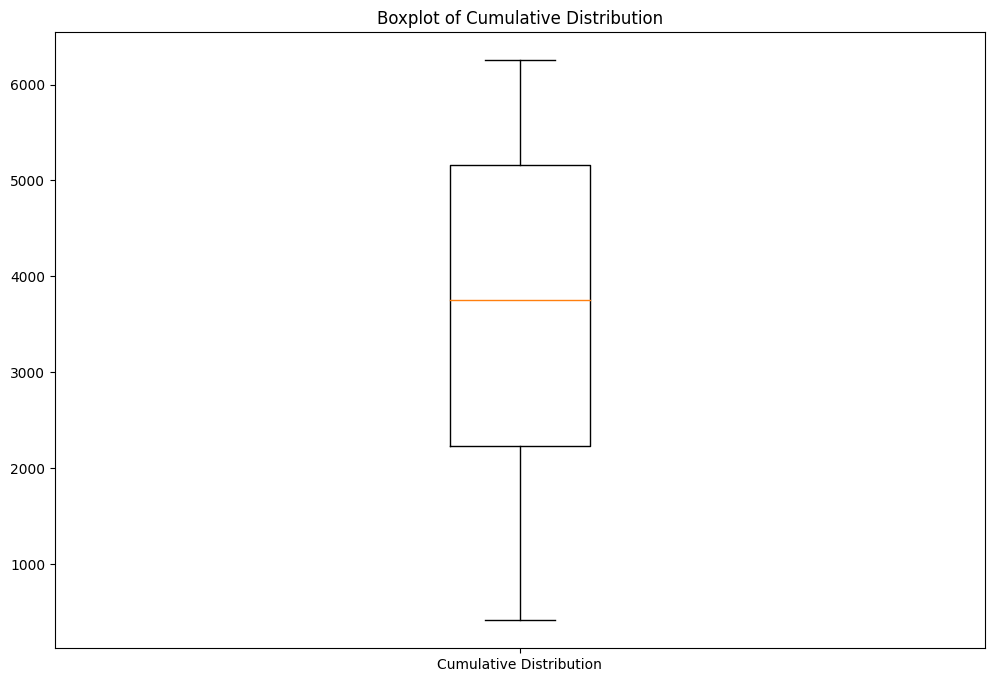

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'label_counts' is your DataFrame with the 'Cumulative' column already computed
# Plotting a boxplot for the cumulative distribution
plt.figure(figsize=(12, 8))
plt.boxplot(label_counts['Cumulative'])
plt.title('Boxplot of Cumulative Distribution')
plt.xticks([1], ['Cumulative Distribution'])
plt.show()


# removing outliers
# Unusual Image size
This code identifies images in a dataset that have unusual sizes compared to the rest of the dataset. It begins by defining a path to the dataset and listing all the subdirectories, which correspond to different classes of images. For each image in these folders, the code reads the image using OpenCV, calculates its size in pixels by multiplying the width and height, and stores these sizes in a list. After converting the list of sizes into a NumPy array, the code calculates the z-scores—a statistical measure that indicates how many standard deviations a data point is from the mean of the dataset. It then identifies outliers as those images whose sizes have z-scores that exceed an absolute value of 3, which is a common threshold for outlier detection. These outliers are likely to be either much larger or smaller than the typical image size in the dataset. The indices of these outliers in the dataset are printed out, which can be used to further examine or process these specific images.

In [16]:
import os
import numpy as np
import cv2
from scipy.stats import zscore

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"

# List all the folders in the dataset
folders = [folder for folder in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, folder))]

# Initialize a list to store image sizes
image_sizes = []

# Loop through each folder (which corresponds to a class)
for folder in folders:
    # Get a list of all the file names of images in this folder
    image_files = os.listdir(os.path.join(PATH, folder))
    # Loop through each image file
    for image_file in image_files:
        # Define the path to the image
        image_path = os.path.join(PATH, folder, image_file)
        # Load the image
        image = cv2.imread(image_path)
        # Get the size (in pixels) of the image
        size = image.shape[0] * image.shape[1]
        # Append the size to our list
        image_sizes.append(size)

# Convert the list to a NumPy array
image_sizes = np.array(image_sizes)

# Calculate z-scores for the image sizes
z_scores = zscore(image_sizes)

# Define a threshold for what we consider to be an outlier
# Typically, a z-score above 3 or below -3 is considered an outlier
threshold = 3

# Find indices of outliers
outlier_indices = np.where((z_scores > threshold) | (z_scores < -threshold))

# Print the outliers
print(f"Outliers based on image size: {outlier_indices}")


Outliers based on image size: (array([  62,  114,  126,  129,  176,  220,  287,  326,  368,  421,  426,
        446,  529,  605,  629,  631,  715,  750,  759,  775,  790,  817,
        832,  906,  936, 1006, 1044, 1046, 1086, 1101, 1128, 1143, 1147,
       1150, 1157, 1182, 1194, 1200, 1204, 1211, 1219, 1279, 1285, 1295,
       1308, 1348, 1350, 1378, 1433, 1474, 1521, 1544, 1581, 1593, 1669,
       1710, 1731, 1753, 1775, 1776, 1880, 1919, 1969, 2020, 2037, 2056,
       2073, 2075, 2096, 2204, 2322, 2326, 2350, 2361, 2365, 2421, 2422,
       2436, 2455, 2477, 2489, 2500, 2509, 2534, 2540, 2581, 2600, 2610,
       2619, 2628, 2730, 2795, 2798, 2928, 2943, 2959, 3068, 3095, 3124,
       3144, 3146, 3180, 3202, 3229, 3250, 3261, 3271, 3281, 3376, 3439,
       3683, 3702, 3741, 3792, 3930, 3948, 3951, 3960, 4055, 4170, 4268,
       4274, 4433, 4469, 4516, 4543, 4614, 4701, 4787, 4801, 4802, 4829,
       4838, 4841, 4858, 4861, 4864, 4889, 4910, 4934, 5083, 5196, 5241,
       5253, 5286, 5

Displaying 5 outliers based on image size:
../input/indian-food-classification/Food Classification/momos/002.jpg
../input/indian-food-classification/Food Classification/momos/064.jpg
../input/indian-food-classification/Food Classification/momos/086.jpg
../input/indian-food-classification/Food Classification/momos/017.jpg
../input/indian-food-classification/Food Classification/momos/216.jpg


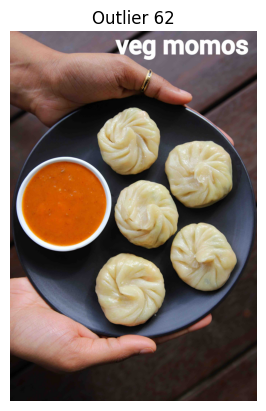

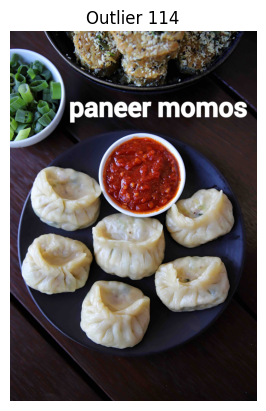

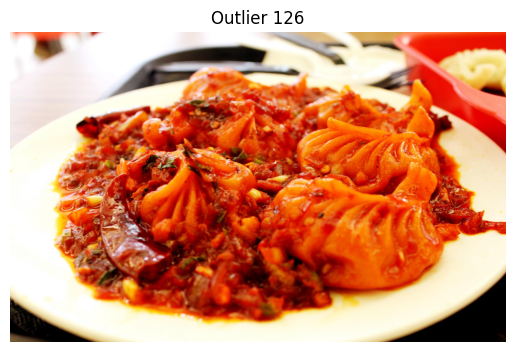

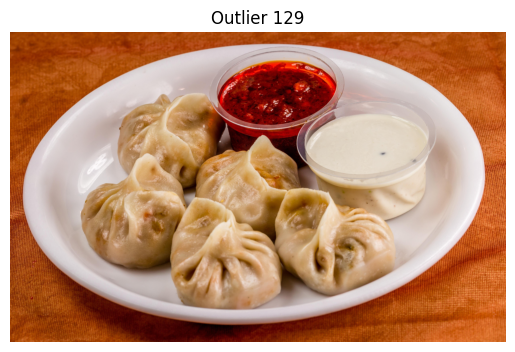

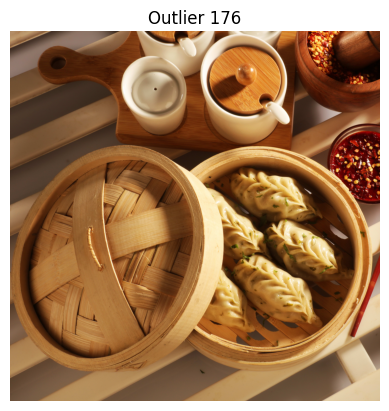

In [17]:
import os
import numpy as np
import cv2
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"

# List all the folders in the dataset
folders = [folder for folder in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, folder))]

# Initialize a list to store image sizes and file paths
image_sizes = []
file_paths = []

# Loop through each folder (which corresponds to a class)
for folder in folders:
    # Get a list of all the file names of images in this folder
    image_files = os.listdir(os.path.join(PATH, folder))
    # Loop through each image file
    for image_file in image_files:
        # Define the path to the image
        image_path = os.path.join(PATH, folder, image_file)
        # Load the image
        image = cv2.imread(image_path)
        # Get the size (in pixels) of the image
        size = image.shape[0] * image.shape[1]
        # Append the size and file path to our lists
        image_sizes.append(size)
        file_paths.append(image_path)

# Convert the list to a NumPy array
image_sizes = np.array(image_sizes)

# Calculate z-scores for the image sizes
z_scores = zscore(image_sizes)

# Define a threshold for what we consider to be an outlier
# Typically, a z-score above 3 or below -3 is considered an outlier
threshold = 3

# Find indices of outliers
outlier_indices = np.where((z_scores > threshold) | (z_scores < -threshold))[0]

# Limit the number of outliers to print
num_outliers_to_display = 5
display_indices = outlier_indices[:num_outliers_to_display]

# Print the paths of the outliers
print(f"Displaying {num_outliers_to_display} outliers based on image size:")
for index in display_indices:
    print(file_paths[index])

# Display individual outliers
for index in display_indices:
    image = cv2.cvtColor(cv2.imread(file_paths[index]), cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Outlier {index}")
    plt.show()


# Image Quality Outliers (using blur detection with Laplacian variance)
This code calculates the quality of images based on the variance of the Laplacian filter, which is a measure of sharpness or focus. Images with low variance in the Laplacian are typically blurry, and high variance indicates a sharp image. The code computes this focus measure for each image in the dataset and then uses a z-score to detect outliers, which are images that are significantly blurrier or sharper than the average. It displays the first few outlier images based on image quality.



Image Quality Outliers:


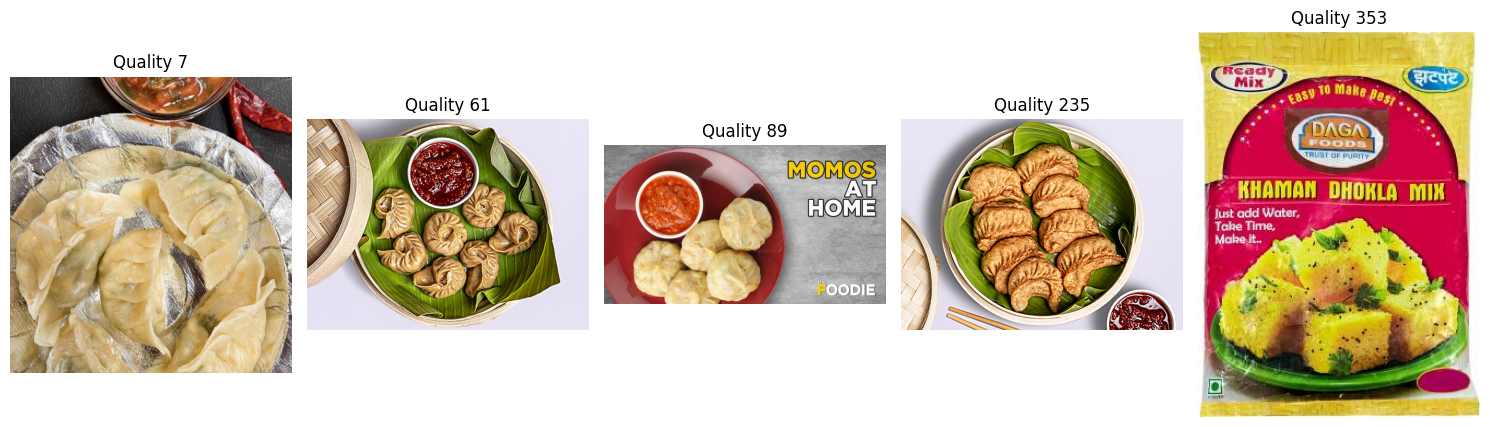

In [18]:
import os
import cv2
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Define the path to the dataset
PATH = "../input/indian-food-classification/Food Classification"

# Function to calculate image quality using Laplacian variance
def calculate_image_quality(image_path):
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    focus_measure = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    return focus_measure

# Load images and compute quality
file_paths = []
quality_scores = []

for folder in os.listdir(PATH):
    folder_path = os.path.join(PATH, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            file_paths.append(image_path)
            quality_scores.append(calculate_image_quality(image_path))

# Convert to NumPy array
quality_scores = np.array(quality_scores)

# Detect outliers
quality_outliers = np.where(zscore(quality_scores) > 3)[0]

# Display outliers
def display_outliers(outlier_indices, file_paths, title):
    if len(outlier_indices) == 0:
        print(f"No outliers detected for {title}.")
        return
    
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(outlier_indices[:5]):  # Displaying only first 5 outliers
        image = cv2.cvtColor(cv2.imread(file_paths[idx]), cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(f"{title} {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the display function
print("Image Quality Outliers:")
display_outliers(quality_outliers, file_paths, "Quality")


# Color histogram
This code calculates the color histograms of the images. A color histogram represents the distribution of colors in an image; it counts how many times each color appears. This is done across the RGB color channels. The code then uses a z-score to detect images whose color distribution is significantly different from that of the majority of images. Outliers could be images that are overly bright, dark, or have an unusual color cast. It displays the first few outlier images based on color distribution.

Color Histogram Outliers:


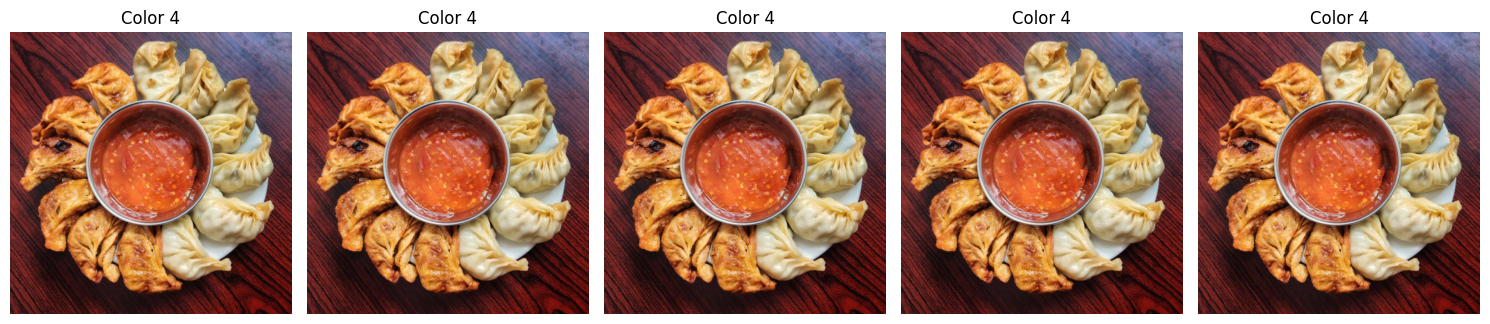

In [19]:
import os
import cv2
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Function to calculate color histogram
def calculate_color_histogram(image_path):
    image = cv2.imread(image_path)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    return hist.flatten()

# Load images and compute color histograms
file_paths = []
color_histograms = []

for folder in os.listdir(PATH):
    folder_path = os.path.join(PATH, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            file_paths.append(image_path)
            color_histograms.append(calculate_color_histogram(image_path))

# Convert to NumPy array
color_histograms = np.array(color_histograms)

# Detect outliers
color_outliers = np.where(zscore(color_histograms) > 3)[0]

# Call the display function
print("Color Histogram Outliers:")
display_outliers(color_outliers, file_paths, "Color")
